[View in Colaboratory](https://colab.research.google.com/github/s-bose/ML-and-Shit/blob/master/TensorflowBasics.ipynb)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [6]:
t1 = tf.constant(2.0, dtype= tf.float32)
print(t1)

Tensor("Const_2:0", shape=(), dtype=float32)


In [9]:
t2 = tf.constant([1.0, 2.0], dtype=tf.float32, name = 'tensor2')
print(t2)

Tensor("tensor2_2:0", shape=(2,), dtype=float32)


In [18]:
node_1 = tf.constant([9, 10, 11], dtype=tf.float32, name='node_1')
node_2 = tf.constant([7, 8, 6.5], dtype=tf.float32, name='node_2')
node_3 = tf.constant(5.6, dtype=tf.float32, name='node_3')
node_4 = tf.constant([7.65, 9.0, 6.75], dtype=tf.float32, name='node_4')
node_5 = tf.constant([13.5, 7.18, 17], dtype=tf.float32, name='node_5')
cg_3 = tf.minimum(((node_1 * node_2)/(node_3)), (node_4+node_5))
with tf.Session() as sess:
  print(sess.run(cg_3))

[11.25     14.285714 12.767858]


In [0]:
X = np.linspace(-30, 300.0, 300)
Y = 2*np.linspace(-30.0, 250.0, 300) + np.random.rand(*X.shape)
train_X = X[:250]
train_Y = Y[:250]
test_X = X[250:]
test_Y = Y[250:]

In [0]:
learning_rate = 0.000001
n_epochs = 1000
interval = 50
#plt.plot(train_X, train_Y, 'r')
#plt.show()

In [0]:
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

In [0]:
w = tf.Variable(0.0, name='weight_1')
b = tf.Variable(0.0, name='bias_1')
pred_y = (w*x) + b

In [0]:
loss = tf.reduce_mean(tf.square(y - pred_y))


In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate= learning_rate) .minimize(loss)

Loss after epoch  0 is  48421.902
Loss after epoch  50 is  1294.6835
Loss after epoch  100 is  59.683346
Loss after epoch  150 is  27.318064
Loss after epoch  200 is  26.468079
Loss after epoch  250 is  26.443985
Loss after epoch  300 is  26.44153
Loss after epoch  350 is  26.43965
Loss after epoch  400 is  26.437777
Loss after epoch  450 is  26.43591
Loss after epoch  500 is  26.434025
Loss after epoch  550 is  26.432161
Loss after epoch  600 is  26.430292
Loss after epoch  650 is  26.42842
Loss after epoch  700 is  26.426548
Loss after epoch  750 is  26.424685
Loss after epoch  800 is  26.422848
Loss after epoch  850 is  26.420982
Loss after epoch  900 is  26.419117
Loss after epoch  950 is  26.41725


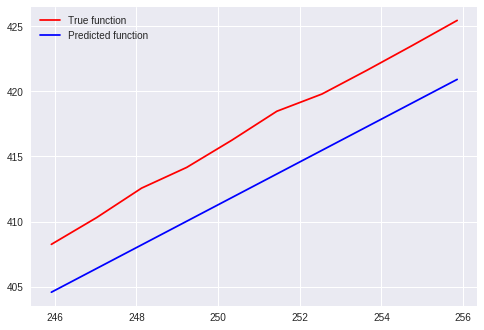

In [53]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  
  for epoch in range(n_epochs):
    _, curr_loss = sess.run([optimizer, loss], feed_dict={x:train_X, y:train_Y})
    
    #print('Loss after epoch ', epoch, 'is ', curr_loss)
    
    if epoch % interval == 0:
       print('Loss after epoch ', epoch, 'is ', curr_loss)
     
    final_preds, final_loss = sess.run([pred_y, loss], feed_dict={x:test_X, y:test_Y})
    
  plt.plot(test_X[:10], test_Y[:10], 'r', label='True function')
  plt.plot(test_X[:10], final_preds[:10], 'b', label='Predicted function')
  plt.legend()
  plt.show()